<a href="https://colab.research.google.com/github/venkatshukla/EIP/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


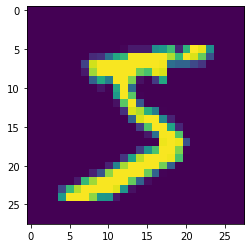

In [63]:
print (X_train.shape)
from matplotlib import pyplot as plt
#plt.rcParams['axes.facecolor'] = 'white'
#plt.grid(c='grey')
%matplotlib inline
plt.imshow(X_train[0])

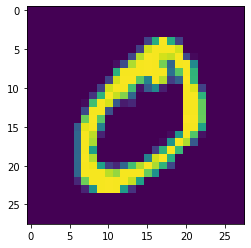

In [64]:

plt.imshow(X_train[1])


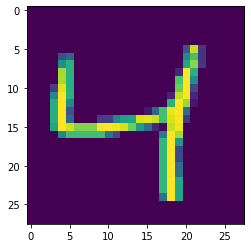

In [65]:
plt.imshow(X_train[2])

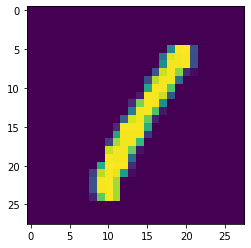

In [66]:
plt.imshow(X_train[3])

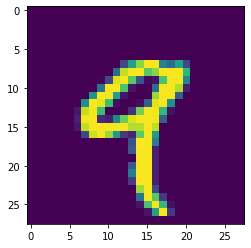

In [67]:
plt.imshow(X_train[4])

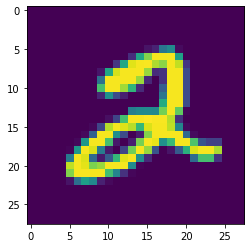

In [68]:
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [71]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [72]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [74]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [115]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


In [116]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 9, 9, 128)         147584    
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 1, 1, 10)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [118]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.1064 - acc: 0.9680
Epoch 2/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0376 - acc: 0.9886
Epoch 3/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0276 - acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0209 - acc: 0.9931
Epoch 5/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0161 - acc: 0.9949
Epoch 6/10
60000/60000 [==============================] - 12s 207us/step - loss: 0.0137 - acc: 0.9957
Epoch 7/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0107 - acc: 0.9965
Epoch 8/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0094 - acc: 0.9972
Epoch 9/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0079 - acc: 0.9978
Epoch 10/10
60000/60000 [==============================] - 12s 201us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [120]:
print(score)

[0.030765441474336193, 0.9932]


In [0]:
y_pred = model.predict(X_test)

In [82]:
print(y_pred[:9])
print(y_test[:9])

[[7.42775426e-20 4.39172948e-26 1.89985295e-16 7.78275999e-10
  3.32313675e-29 6.56438887e-17 4.41883027e-36 1.00000000e+00
  1.53877765e-15 1.78334160e-12]
 [2.55606353e-16 4.31273150e-21 1.00000000e+00 5.75574848e-21
  1.75561500e-25 2.16197509e-31 2.97318226e-17 5.65793741e-29
  4.80100595e-21 3.86785743e-27]
 [3.75967257e-09 9.99905944e-01 3.57836960e-08 7.65259384e-12
  1.47875535e-05 1.51487567e-09 3.06440828e-09 4.14409300e-07
  7.87537938e-05 2.47881271e-10]
 [1.00000000e+00 4.29945020e-25 4.35640369e-12 3.69934769e-12
  2.02449186e-22 4.59756547e-17 1.60791519e-13 1.79778704e-13
  7.12519488e-10 3.27852539e-14]
 [3.18343992e-16 3.55298711e-21 3.96805607e-16 7.59008274e-18
  1.00000000e+00 8.09458940e-19 1.16298265e-18 1.91701009e-18
  1.16137371e-10 6.28222517e-12]
 [7.00343827e-09 9.99321580e-01 5.98423995e-08 1.46827897e-11
  4.06247818e-05 3.78615403e-11 4.75157153e-12 4.80474351e-04
  1.57120448e-04 1.77988753e-07]
 [5.49276882e-33 8.32964983e-19 2.76713670e-18 1.52143084e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

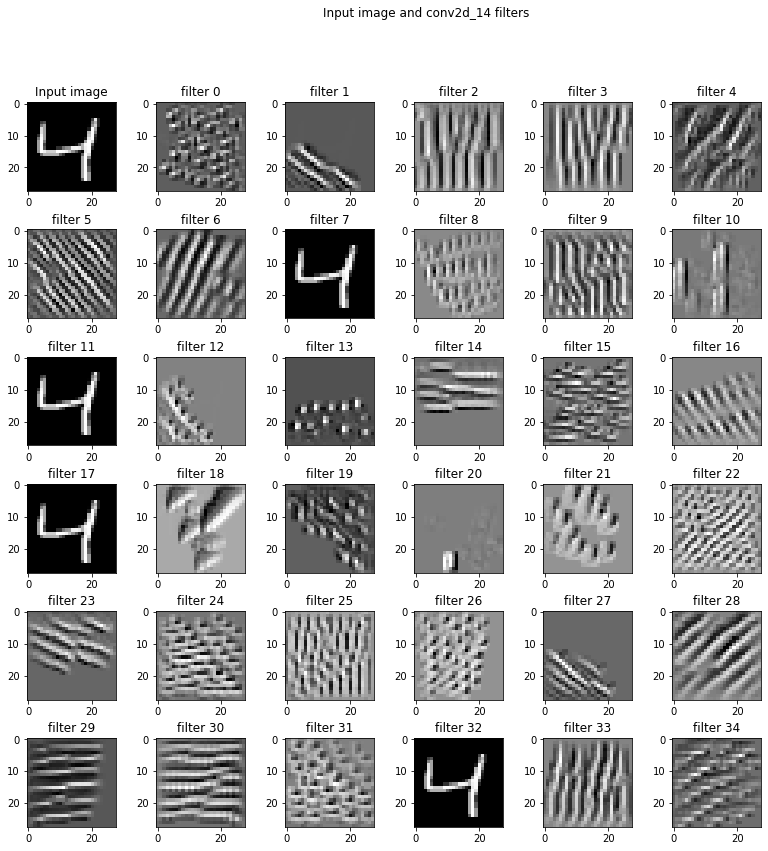

In [84]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()